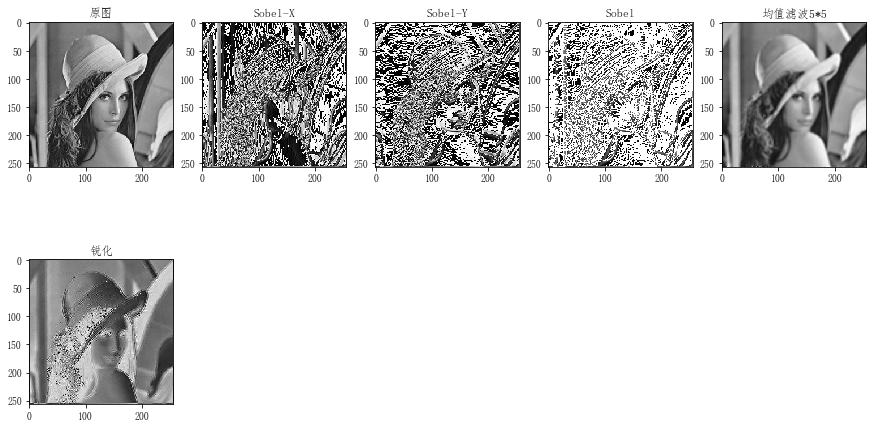

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

def imConv(image_array,suanzi, kernelDim):
    image = image_array.copy()

    dim1,dim2 = image.shape
    newImageDelta = int((kernelDim - 1)/2)
    for i in range(newImageDelta,dim1-newImageDelta):
        for j in range(newImageDelta,dim2-newImageDelta):
            image[i,j] = (image_array[(i-newImageDelta):(i+newImageDelta+1),(j-newImageDelta):(j+newImageDelta+1)]*suanzi).sum()

    image = image*(255.0/image.max())

    return image
image_BGR = cv2.imread('images/12/Lena.png')
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
image_Gray = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15,8), facecolor='w')
plt.subplot(251)
plt.title('原图')
plt.imshow(image_Gray, cmap='gray')

plt.subplot(252)
plt.title('Sobel-X')
suanzi_x = np.array([[-1, 0, 1],
                     [ -2, 0, 2],
                     [ -1, 0, 1]])
image_x = imConv(image_Gray, suanzi_x,3)
plt.imshow(image_x, cmap='gray')

plt.subplot(253)
plt.title('Sobel-Y')
suanzi_y = np.array([[-1,-2,-1],
                     [ 0, 0, 0],
                     [ 1, 2, 1]])
image_y = imConv(image_Gray,suanzi_y, 3)
plt.imshow(image_y, cmap='gray')

plt.subplot(254)
# 得到梯度矩阵
image_xy = np.sqrt(image_x**2+image_y**2)
# 梯度矩阵统一到0-255
image_xy = (255.0/image_xy.max())*image_xy

plt.title('Sobel')
plt.imshow(image_xy, cmap='gray')

plt.subplot(255)
plt.title('均值滤波5*5')
kernel = np.ones((5,5), np.float32) / (5 * 5)
plt.imshow(imConv(image_Gray, kernel, 5), cmap='gray')

plt.subplot(256)
RuiHua = np.array([[0,-1,0],
                   [ -1, 3, -1],
                   [0, -1, 0]])
plt.title('锐化')
plt.imshow(imConv(image_Gray, RuiHua, 3), cmap='gray')
plt.show()